### Import libraries

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Reading the data

In [45]:
df = pd.read_csv('DataSet_HAR.csv')

In [46]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### Train and Test datasets

In [47]:
# train_ppl = random_indx[0:24]
train_ppl = [19, 29, 16, 10, 30, 7, 24, 27, 21, 12, 28, 18, 25, 3, 1, 11, 6, 23, 22, 20, 13, 15, 14, 17]

In [48]:
# test_ppl = random_indx[24:]
test_ppl = [8, 9, 2, 26, 5, 4]

In [49]:
df_train = df[df['subject'].isin(train_ppl)]

In [50]:
df_test = df[df['subject'].isin(test_ppl)]

### Dividing datasets to x and y

In [51]:
df_train = df_train.reset_index()
df_train= df_train.drop(['index', 'subject'], axis=1)
df_test = df_test.reset_index()
df_test= df_test.drop(['index', 'subject'], axis=1)

In [52]:
df_test_y = df_test[['Activity']]
df_test = df_test.drop(['Activity'], axis=1)

In [53]:
df_train_y = df_train[['Activity']]
df_train = df_train.drop(['Activity'], axis=1)

### Convert categorical data of Activity attribute to numerical

In [54]:
df_train_y['Activity'] = pd.Categorical(df_train_y['Activity'])
df_train_y['Activity'] = df_train_y.Activity.cat.codes
df_test_y['Activity'] = pd.Categorical(df_test_y['Activity'])
df_test_y['Activity'] = df_test_y.Activity.cat.codes

### Convert dataframes to numpy array

In [55]:
y_train = df_train_y.values
y_train.shape

(8417, 1)

In [56]:
y_test = df_test_y.values

### Setting my data for PCA

In [57]:
pca = PCA(n_components=21)

In [58]:
X_train = pca.fit_transform(df_train)

In [59]:
X_test = pca.transform(df_test)

### SVM

In [65]:
model = svm.SVC(C=100, kernel= 'linear', gamma='auto')

In [66]:
model.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
Y_pred = model.predict(X_test)

In [68]:
cm = confusion_matrix(y_test, Y_pred)
cm

array([[334,   0,   0,   0,   0,   0],
       [  0, 274,  38,   0,   0,   2],
       [  0,  92, 247,   0,   0,   0],
       [  0,   0,   0, 309,  12,  13],
       [  0,   0,   0,  18, 250,   1],
       [  0,   0,   0,  21,  19, 252]])

In [69]:
accuracy_score(y_test, Y_pred)

0.8852284803400637

In [71]:
y = []
x = []

for i in range(1, 51):
    x.append(i)
    pca = PCA(n_components=i)
    X_train = pca.fit_transform(df_train)
    X_test = pca.transform(df_test)
    model = svm.SVC(C=100, kernel= 'rbf', gamma='auto')
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    y.append(accuracy_score(y_test, Y_pred))

Text(0, 0.5, 'The accuracy')

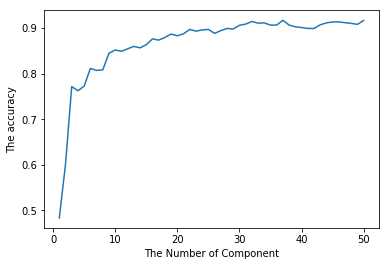

In [73]:
plt.plot(x, y)
plt.xlabel('The Number of Component')
plt.ylabel('The accuracy')

In [74]:
for i in range(len(y)):
    if y[i] > 0.9:
        print(i)
        print(y[i])

29
0.905951115834219
30
0.9086078639744952
31
0.9144527098831031
32
0.9107332624867163
33
0.9112646121147715
34
0.9064824654622742
35
0.9064824654622742
36
0.9171094580233794
37
0.9064824654622742
38
0.9027630180658873
39
0.9011689691817216
42
0.9070138150903294
43
0.9112646121147715
44
0.9133900106269925
45
0.9133900106269925
46
0.9117959617428267
47
0.910201912858661
48
0.90807651434644
49
0.9165781083953242
